In [1]:
import torch
import numpy
import matplotlib.pyplot as plt


In [5]:
weight = 0.7
bias = 0.3 

In [6]:
# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)

In [7]:
y = weight * X + bias

In [9]:
X[:4], y[:4]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420]]))

In [8]:
split = 40
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [11]:
len(X_train), len(y_train)

(40, 40)

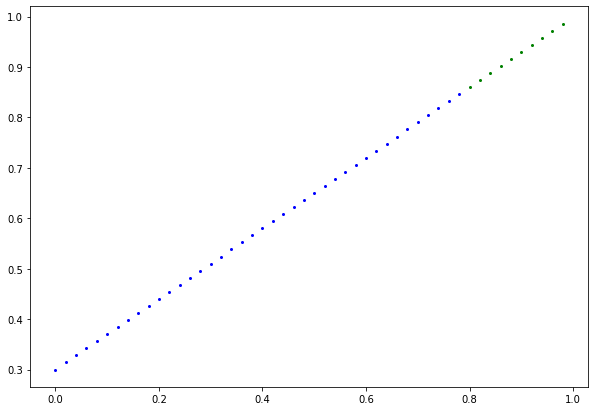

In [12]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(X_train, y_train,  c="b", s=4, label="Training data")
ax.scatter(X_test, y_test, c="g", s=4, label="Testing data")

In [9]:
#from torch import nn


class LinearReg(torch.nn.Module):

  def __init__(self):
    super().__init__()
    self.weights = torch.nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float))
    self.bias = torch.nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float))
  def forward(self, x: torch.Tensor):
    return self.weights * x + self.bias

In [10]:
torch.manual_seed(42)
model_0 = LinearReg()

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
X_test[2]

tensor([0.8400])

In [17]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [18]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [19]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

In [20]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [21]:
with torch.inference_mode():
  ypred = model_0(X_test)

ypred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [22]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

###Train model

In [12]:
loss_fn = torch.nn.L1Loss()
params =model_0.parameters()
optimizer = torch.optim.SGD(params=params,  lr=0.01)

In [24]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

###Building a training loop and Testing in Pytorch

In [25]:
epochs = 9

#Training

for epoch in range(epochs):
  model_0.train()


  y_pred = model_0(X_train)

  #Calculate the loss
  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  #Perfrom backpro
  loss.backward()

  optimizer.step()


In [26]:
model_0(X_test)

tensor([[0.5162],
        [0.5237],
        [0.5311],
        [0.5385],
        [0.5460],
        [0.5534],
        [0.5609],
        [0.5683],
        [0.5757],
        [0.5832]], grad_fn=<AddBackward0>)

In [27]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [28]:
epochs = 40

for epoch in range(epochs):
  #Forward pass
  y_preds = model_0(X_train)

  loss = loss_fn(y_preds, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

In [29]:
model_0(X_test)

tensor([[0.7775],
        [0.7873],
        [0.7971],
        [0.8069],
        [0.8167],
        [0.8265],
        [0.8363],
        [0.8461],
        [0.8559],
        [0.8657]], grad_fn=<AddBackward0>)

In [30]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [31]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.4902], requires_grad=True), Parameter containing:
 tensor([0.3853], requires_grad=True)]

In [13]:
epochs = 250
epoch_count = []
losses = []
test_losses =[]


for epoch in range(epochs):

  ##Forward Pass
  y_preds =   model_0(X_train)

  #Calculate the loss
  loss = loss_fn(y_preds, y_train)

  ##Optimizer
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ##Testing Loop
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)
  if epoch % 20== 0:
    epoch_count.append(epoch)
    losses.append(loss)
    test_losses.append(test_loss)
    print(f' epoch: {epoch} - loss: {loss:.4f} - testloss {test_loss:.4f} ')





 epoch: 0 - loss: 0.3129 - testloss 0.4811 
 epoch: 20 - loss: 0.0891 - testloss 0.2173 
 epoch: 40 - loss: 0.0454 - testloss 0.1136 
 epoch: 60 - loss: 0.0382 - testloss 0.0889 
 epoch: 80 - loss: 0.0313 - testloss 0.0723 
 epoch: 100 - loss: 0.0245 - testloss 0.0565 
 epoch: 120 - loss: 0.0176 - testloss 0.0406 
 epoch: 140 - loss: 0.0107 - testloss 0.0241 
 epoch: 160 - loss: 0.0039 - testloss 0.0082 
 epoch: 180 - loss: 0.0089 - testloss 0.0050 
 epoch: 200 - loss: 0.0089 - testloss 0.0050 
 epoch: 220 - loss: 0.0089 - testloss 0.0050 
 epoch: 240 - loss: 0.0089 - testloss 0.0050 


In [14]:
epoch_count, losses, test_losses

([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240],
 [tensor(0.3129, grad_fn=<L1LossBackward0>),
  tensor(0.0891, grad_fn=<L1LossBackward0>),
  tensor(0.0454, grad_fn=<L1LossBackward0>),
  tensor(0.0382, grad_fn=<L1LossBackward0>),
  tensor(0.0313, grad_fn=<L1LossBackward0>),
  tensor(0.0245, grad_fn=<L1LossBackward0>),
  tensor(0.0176, grad_fn=<L1LossBackward0>),
  tensor(0.0107, grad_fn=<L1LossBackward0>),
  tensor(0.0039, grad_fn=<L1LossBackward0>),
  tensor(0.0089, grad_fn=<L1LossBackward0>),
  tensor(0.0089, grad_fn=<L1LossBackward0>),
  tensor(0.0089, grad_fn=<L1LossBackward0>),
  tensor(0.0089, grad_fn=<L1LossBackward0>)],
 [tensor(0.4811),
  tensor(0.2173),
  tensor(0.1136),
  tensor(0.0889),
  tensor(0.0723),
  tensor(0.0565),
  tensor(0.0406),
  tensor(0.0241),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

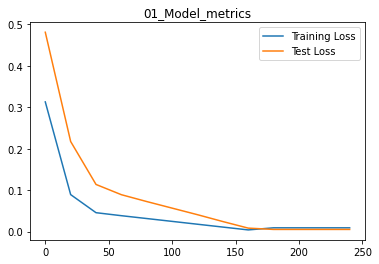

In [18]:
plt.plot(epoch_count, torch.tensor(losses), label ='Training Loss')
plt.plot(epoch_count, test_losses, label ='Test Loss')
plt.title('01_Model_metrics')
plt.legend();

In [19]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [21]:
from pathlib import Path

In [22]:
MODEL_PATH = Path('model')
MODEL_PATH.mkdir(parents = True, exist_ok=True)

In [28]:
MODEL_NAME = '01_python_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [29]:
MODEL_SAVE_PATH

PosixPath('model/01_python_model.pth')

In [30]:
print(f'saving model to: {MODEL_SAVE_PATH}')
torch.save(model_0, MODEL_SAVE_PATH)
print(f'model saved to: {MODEL_SAVE_PATH}')

saving model to: model/01_python_model.pth
model saved to: model/01_python_model.pth


In [80]:
!ls -l model

total 8
-rw-r--r-- 1 root root 1063 Aug 18 16:30 01_python_model
-rw-r--r-- 1 root root 1063 Aug 18 16:30 01_python_model.h5


In [81]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [31]:
model_load = torch.load(MODEL_SAVE_PATH)

In [36]:
with torch.inference_mode():
  new_pred =model_load(X_test)

In [37]:
new_pred

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [197]:
torch.__version__

'1.12.1+cu113'

In [198]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [199]:
print(device)

cpu


In [200]:
## Create some data

weight = 0.4
bias = 0.6

start = 0
end = 100

step = 0.005

In [201]:
X = torch.arange(start, end, step).unsqueeze(dim=1)

In [202]:
X.shape

torch.Size([20000, 1])

In [203]:
 y = weight * X + bias

In [204]:
len(y)

20000

In [205]:
split = int(0.8 *len(X))
split

16000

In [206]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0050],
         [0.0100],
         [0.0150],
         [0.0200],
         [0.0250],
         [0.0300],
         [0.0350],
         [0.0400],
         [0.0450]]), tensor([[0.6000],
         [0.6020],
         [0.6040],
         [0.6060],
         [0.6080],
         [0.6100],
         [0.6120],
         [0.6140],
         [0.6160],
         [0.6180]]))

In [207]:
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [208]:
len(X_train), len(y_train)

(16000, 16000)

### Build a Model

In [209]:
from torch import nn
class NewModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)
    


  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)

In [210]:
torch.manual_seed(42)
model_1 = NewModel()

In [211]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [212]:
list(model_1.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True), Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [213]:
device

'cpu'

In [214]:
device ='cuda' if torch.cuda.is_available else 'cpu'

In [221]:
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr= 0.0001)




In [175]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.0001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [176]:
###Training and testing
torch.manual_seed(42)

epochs = 300
epoch_count =[]
train_loss = []
test_loss = []

for epoch in range(epochs):
  ##Forward pass
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ##Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    loss_test = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss.append(loss)
      test_loss.append(loss_test)
      print(f'Epoch: {epoch} - Loss: {loss} - TestLoss: {loss_test}')
 

Epoch: 0 - Loss: 3.576622247695923 - TestLoss: 7.744086265563965
Epoch: 10 - Loss: 1.9763081073760986 - TestLoss: 4.143988609313965
Epoch: 20 - Loss: 0.37935811281204224 - TestLoss: 0.5493008494377136
Epoch: 30 - Loss: 0.1137680783867836 - TestLoss: 0.043858643621206284
Epoch: 40 - Loss: 0.08713136613368988 - TestLoss: 0.09906941652297974
Epoch: 50 - Loss: 0.12860357761383057 - TestLoss: 0.012302663177251816
Epoch: 60 - Loss: 0.10052897036075592 - TestLoss: 0.07222256064414978
Epoch: 70 - Loss: 0.13602343201637268 - TestLoss: 0.003908755257725716
Epoch: 80 - Loss: 0.1006038635969162 - TestLoss: 0.07244421541690826
Epoch: 90 - Loss: 0.13578909635543823 - TestLoss: 0.0033905773889273405
Epoch: 100 - Loss: 0.10275482386350632 - TestLoss: 0.06832575798034668
Epoch: 110 - Loss: 0.1368609219789505 - TestLoss: 0.004752804525196552
Epoch: 120 - Loss: 0.09771451354026794 - TestLoss: 0.07916711270809174
Epoch: 130 - Loss: 0.13345880806446075 - TestLoss: 0.003403732320293784
Epoch: 140 - Loss: 0.

In [177]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3960]])),
             ('linear_layer.bias', tensor([0.6438]))])

In [178]:
weight, bias

(0.4, 0.6)

In [179]:
model_1(X_test)

tensor([[32.3273],
        [32.3293],
        [32.3313],
        ...,
        [40.2423],
        [40.2442],
        [40.2462]], grad_fn=<AddmmBackward0>)

In [180]:
y_test

tensor([[32.6000],
        [32.6020],
        [32.6040],
        ...,
        [40.5940],
        [40.5960],
        [40.5980]])

In [ ]:
from pathlib import Path

In [182]:
MODEL_PATH = Path('modelsave')
MODEL_PATH.mkdir()

In [183]:
MODEL_NAME = 'model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

In [184]:

torch.save(obj=model_1.state_dict(), f = MODEL_SAVE_PATH)

In [193]:
model_1new=NewModel()

In [194]:
model_1new.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [195]:
model_1new(X_test)

tensor([[32.3273],
        [32.3293],
        [32.3313],
        ...,
        [40.2423],
        [40.2442],
        [40.2462]], grad_fn=<AddmmBackward0>)